In [1]:
import sys, os
sys.path.insert(0,"/home/zhi/SULI21")
import quasim as qua
import numpy as np

In [6]:
import matplotlib.cm as cm
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d, Axes3D

In [2]:
QT = qua.QuaTel()
BSC = qua.BSC_process("/home/zhi/SULI21/bsc5.dat")
#Output as [[star_num1,RA1,DEC1,S1],[star_num2,RA2,DEC2,S2],....] 
#in rad and Jy, S is in V-band
BSC.pos_s[4047:4050]

array([[ 4.05700000e+03,  2.70513671e+00,  3.46302412e-01,
         3.28928408e+02],
       [ 4.05800000e+03,  2.70515853e+00,  3.46283020e-01,
         1.09926243e+02],
       [ 4.05900000e+03,  2.70323867e+00, -8.91136027e-02,
         1.03062669e+01]])

In [3]:
lam = 0.55*10**(-6)

#A bunch of telescope positions
#[RA,DEC,RADIUS] in rad and meter
pos_t_EW = [[-1.3,0.1,6.4*10**(6)],[-1.30003,0.1,6.39995*10**(6)]]   #SEPARATED BY E-W
pos_t_NS = [[-1.3,0.1,6.4*10**(6)],[-1.3,0.10003,6.40002*10**(6)]]
pos_t_SE = [[-1.3,0.1,6.4*10**(6)],[-1.30002,0.10002,6.399977*10**(6)]]

#NEW YORK COORD but the overall baseline is E-W, with B ~ 270m
pos_t_NY = [[-1.3,0.71,6.0*10**(6)],[-1.300016,0.7099713,6.0002*10**(6)]]  
 
#[RA,DEC,S] in rad and Jy for flux density
pos = BSC.BSC_filter(pos_t_NY)
print(pos.shape)
T = 10.0  #Period of observation[sec]


(19, 2, 4)


In [4]:
num, t, baseline = QT.get_num_photon(pos,pos_t_NY,lam,T,'pos')

In [11]:
print(baseline)
pos[12:]

[ 4.44394900e-01 -2.73777510e+02 -2.29124601e-01]


array([[[2.48400000e+03, 1.76841123e+00, 2.25069903e-01, 1.64854719e+02],
        [2.47800000e+03, 1.76273164e+00, 2.30868275e-01, 5.82239122e+01]],

       [[2.89100000e+03, 1.98356669e+00, 5.56556410e-01, 5.87626515e+02],
        [2.89000000e+03, 1.98356669e+00, 5.56561258e-01, 2.56508277e+02]],

       [[3.79900000e+03, 2.50814722e+00, 9.08468116e-01, 5.76901122e+01],
        [3.77500000e+03, 2.49955874e+00, 9.01937676e-01, 1.96381867e+02]],

       [[4.05800000e+03, 2.70515853e+00, 3.46283020e-01, 1.09926243e+02],
        [4.05700000e+03, 2.70513671e+00, 3.46302412e-01, 3.28928408e+02]],

       [[5.05500000e+03, 3.50785000e+00, 9.58563914e-01, 9.57417549e+01],
        [5.05400000e+03, 3.50778455e+00, 9.58626940e-01, 4.49884866e+02]],

       [[5.06200000e+03, 3.51345687e+00, 9.59722619e-01, 9.05944064e+01],
        [5.05400000e+03, 3.50778455e+00, 9.58626940e-01, 4.49884866e+02]],

       [[5.06200000e+03, 3.51345687e+00, 9.59722619e-01, 9.05944064e+01],
        [5.05500000e+03, 3

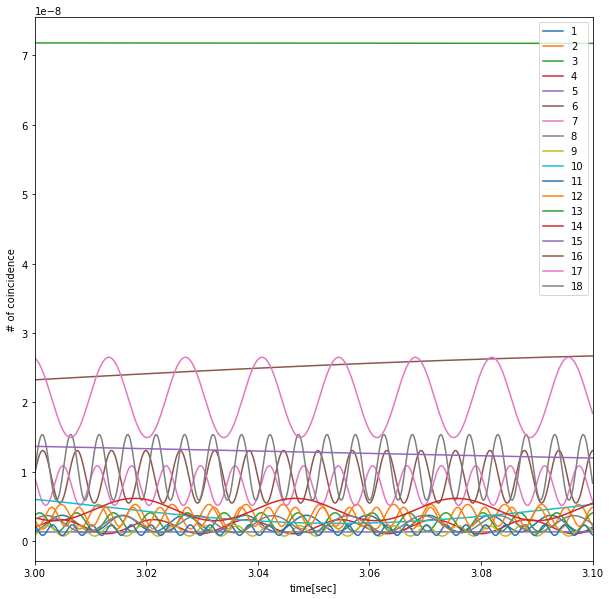

In [7]:
N = t.size
plt.figure(figsize=(10,10))
plt.xlim([3.0,3.1])
#plt.ylim([0.0,5.0*10**(-9)])
for i in range(18):
    j=i+1
    plt.plot(t[N/4:N/2],num[j,N/4:N/2],label= j)
    
plt.xlabel('time[sec]');plt.ylabel('# of coincidence')
plt.legend()

#There is one shows 0 number of coincidence because its current position is outside of 
# telescope plane. Need longer period of observation so Earth is rotated by sufficiently.

In [10]:
%matplotlib notebook

In [11]:
# Lets plot the sources telescopes visually

r = 0.8
pi = np.pi
cos = np.cos
sin = np.sin
phi, theta = np.mgrid[0.0:2.0*pi:100j, 0.0:1.0*pi:100j]
x = r*sin(theta)*cos(phi)
y = r*sin(theta)*sin(phi)
z = r*cos(theta)

PHIs, THETAs = pos[1:][:,:,1], np.pi/2 - pos[1:][:,:,2]
s_xx = 5*sin(THETAs)*cos(PHIs)    #(N,2)
s_yy = 5*sin(THETAs)*sin(PHIs)
s_zz = 5*cos(THETAs)
L = len(s_xx)

t_xx = 1.0*sin(np.pi/2 - 0.71)*cos(-1.3)
t_yy = 1.0*sin(np.pi/2 - 0.71)*sin(-1.3)
t_zz = 1.0*cos(pi/2. - 0.71)

<IPython.core.display.Javascript object>


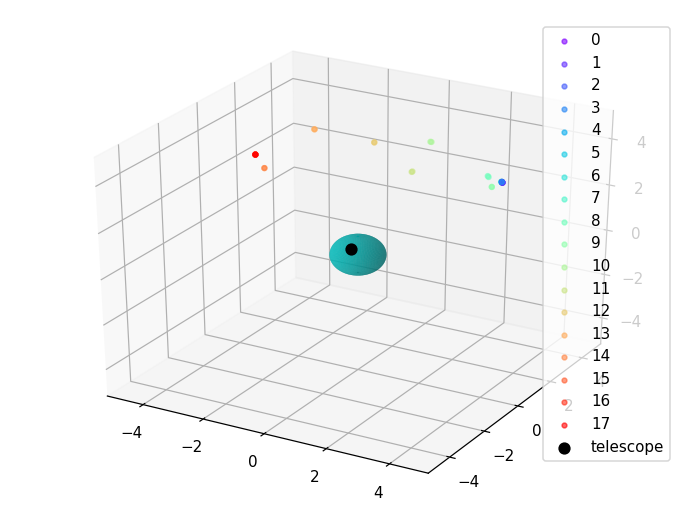

In [12]:
colors = cm.rainbow(np.linspace(0,1,L))

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.plot_surface(
    x, y, z,  rstride=1, cstride=1, color='c', alpha=0.8, linewidth=0)

for i in range(L):
    ax.scatter(s_xx[i],s_yy[i],s_zz[i],alpha = 0.6, color=colors[i],s=10,label=i)

ax.scatter(t_xx,t_yy,t_zz, color = 'k', alpha = 1.0, s=50, label='telescope')
ax.set_xlim([-5,5])
ax.set_ylim([-5,5])
ax.set_zlim([-5,5])
plt.tight_layout()
plt.legend()
plt.show()

array([[5.0000000e-01, 0.0000000e+00, 1.0000000e+00, 1.0000000e+00],
       [5.0000000e-01, 0.0000000e+00, 1.0000000e+00, 1.0000000e+00],
       [5.0000000e-01, 0.0000000e+00, 1.0000000e+00, 1.0000000e+00],
       ...,
       [1.0000000e+00, 1.2246468e-16, 6.1232340e-17, 1.0000000e+00],
       [1.0000000e+00, 1.2246468e-16, 6.1232340e-17, 1.0000000e+00],
       [1.0000000e+00, 1.2246468e-16, 6.1232340e-17, 1.0000000e+00]])